## Build your own recommendation system for products on an e-commerce website like Amazon.com. 

* Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

* Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/).

* Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

### 1.Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amazon_cols = ['userId', 'productId', 'ratings', 'timestamp']
amazon_cols_required = ['userId', 'productId', 'ratings']
amazon = pd.read_csv("ratings_Electronics.csv", names=amazon_cols, usecols=amazon_cols_required)
amazon.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [4]:
amazon.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [5]:
df = amazon.sample(10000).reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
userId       10000 non-null object
productId    10000 non-null object
ratings      10000 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [7]:
df.head()

,userId,productId,ratings
0,A2Q8H4R1PNG9L7,B005EPN1PC,5.0
1,A13B81F8YM2XOT,B006O2AVFW,5.0
2,A2KCLXNOCXFQCP,B004QW44QE,5.0
3,AS6ALHKTPVS9X,B0000AI0N1,5.0
4,A1JN5A6FY7RN22,B003ES5ZUU,5.0


In [8]:
df.describe()

,ratings
count,10000.000000
mean,4.015000
std,1.383968
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


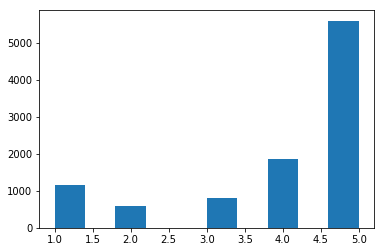

In [9]:
plt.hist(df['ratings'], data=df)
plt.show()

Text(0, 0.5, 'Product')

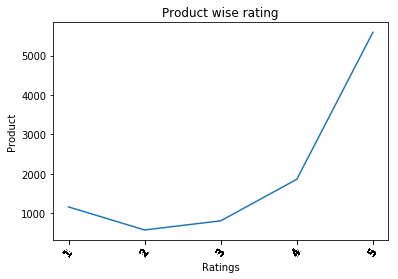

In [13]:
product_by_rating = df.groupby('ratings').size()
plot_product_by_rating = product_by_rating.plot(title='Product wise rating', xticks=df['ratings'], rot=55)
plot_product_by_rating.set_xlabel('Ratings')
plot_product_by_rating.set_ylabel('Product')

In [10]:
prod_grouped = df.groupby(['productId']).agg({'ratings': 'count'}).reset_index()
grouped_sum = prod_grouped['ratings'].sum()
prod_grouped.sort_values(['ratings', 'productId'], ascending = [0,1])

,productId,ratings
5762,B0074BW614,28
1939,B0019EHU8G,24
5565,B006GWO5WK,19
3490,B003ES5ZUU,17
7573,B00DR0PDNE,17
4526,B004QK7HI8,16
5990,B007R5YDYA,15
5432,B00622AG6S,14
554,B0002L5R78,13
3483,B003ELYQGG,12


In [11]:
# Product with id B0074BW614 is the most popular product